
A food delivery service is facing challenges in achieving profitability across its operations. With a dataset of 1,000 food orders, the service seeks to understand the dynamics of its cost structure and profitability to identify strategic opportunities for improvement.

The dataset contains comprehensive details on food orders, including Order ID, Customer ID, Restaurant ID, Order and Delivery Date and Time, Order Value, Delivery Fee, Payment Method, Discounts and Offers, Commission Fee, Payment Processing Fee, and Refunds/Chargebacks. This data provides a foundation for analyzing the cost structure and profitability of the food delivery service.

Your task is to conduct:

##Detailed Cost Analysis: Identifying the major cost components associated with delivering food orders, including direct costs like delivery fees and indirect costs like discounts and payment processing fees.

##Profitability Evaluation: Calculating the profitability of individual orders and aggregating this data to assess overall profitability. This involves examining how revenue generated from commission fees measures against the total costs.

##Strategic Recommendations for Improvement: Based on the cost and profitability analysis, identifying actionable strategies to reduce costs, adjust pricing, commission fees, and discount strategies to improve profitability. This includes finding a “sweet spot” for commission and discount percentages that ensures profitability across orders.

##Impact Simulation of Proposed Strategies: Simulating the financial impact of the recommended strategies on profitability, using the dataset to forecast how adjustments in commission rates and discount strategies could potentially transform current losses into profits.




#Food Delivery Cost and Profitability Analysis: Process We Can Follow
Food Delivery Cost and Profitability Analysis involves examining all the costs associated with delivering food orders, from direct expenses like delivery fees and packaging to indirect expenses like discounts offered to customers and commission fees paid by restaurants. By juxtaposing these costs against the revenue generated (primarily through order values and commission fees), the analysis aims to provide insights into how profitable the food delivery service is on a per-order basis.

Below is the process we can follow for the task of Food Delivery Cost and Profitability Analysis:

##Start by gathering comprehensive data related to all aspects of food delivery operations.
##Clean the dataset for inconsistencies, missing values, or irrelevant information.
##Extract relevant features that could impact cost and profitability.
Break down the costs associated with each order, including fixed costs (like packaging) and variable costs (like delivery fees and discounts).
##Determine the revenue generated from each order, focusing on commission fees and the order value before discounts.
##For each order, calculate the profit by subtracting the total costs from the revenue. Analyze the distribution of profitability across all orders to identify trends.
##Based on the cost and profitability analysis, develop strategic recommendations aimed at enhancing profitability.
##Use the data to simulate the financial impact of proposed changes, such as adjusting discount or commission rates.

##Importing the dependencies'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

In [2]:
from google.colab import files
uploaded=files.upload()

Saving food_orders_new_delhi.csv to food_orders_new_delhi.csv


In [16]:
df=pd.read_csv("food_orders_new_delhi.csv",index_col=0)

#Exploratory data analysis

In [6]:
df.head()

,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
Order ID,,,,,,,,,,,
1,C8270,R2924,01-02-2024 01:11,01-02-2024 02:39,1914,0,Credit Card,5% on App,150,47,0
2,C1860,R2054,02-02-2024 22:11,02-02-2024 22:46,986,40,Digital Wallet,10%,198,23,0
3,C6390,R2870,31-01-2024 05:54,31-01-2024 06:52,937,30,Cash on Delivery,15% New User,195,45,0
4,C6191,R2642,16-01-2024 22:52,16-01-2024 23:38,1463,50,Cash on Delivery,None,146,27,0
5,C6734,R2799,29-01-2024 01:19,29-01-2024 02:48,1992,30,Cash on Delivery,50 off Promo,130,50,0


#Checking for missing or duplicated values

In [8]:
df.isna().sum()

Customer ID               0
Restaurant ID             0
Order Date and Time       0
Delivery Date and Time    0
Order Value               0
Delivery Fee              0
Payment Method            0
Discounts and Offers      0
Commission Fee            0
Payment Processing Fee    0
Refunds/Chargebacks       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer ID             1000 non-null   object
 1   Restaurant ID           1000 non-null   object
 2   Order Date and Time     1000 non-null   object
 3   Delivery Date and Time  1000 non-null   object
 4   Order Value             1000 non-null   int64 
 5   Delivery Fee            1000 non-null   int64 
 6   Payment Method          1000 non-null   object
 7   Discounts and Offers    1000 non-null   object
 8   Commission Fee          1000 non-null   int64 
 9   Payment Processing Fee  1000 non-null   int64 
 10  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 93.8+ KB


In [17]:
duplicates_all = df.duplicated()
print("Duplicates across all columns:")
print(duplicates_all)

Duplicates across all columns:
Order ID
1       False
2       False
3       False
4       False
5       False
        ...  
996     False
997     False
998     False
999     False
1000    False
Length: 1000, dtype: bool


In [18]:
df.describe()

,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1053.969000,28.620000,126.99000,29.832000,28.300000
std,530.975339,16.958278,43.06405,11.627165,49.614228
min,104.000000,0.000000,50.00000,10.000000,0.000000
25%,597.750000,20.000000,90.00000,20.000000,0.000000
50%,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1995.000000,50.000000,200.00000,50.000000,150.000000


from matplotlib import pyplot as plt
_df_0['Order Value'].plot(kind='hist', bins=20, title='Order Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Delivery Fee'].plot(kind='hist', bins=20, title='Delivery Fee')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Commission Fee'].plot(kind='hist', bins=20, title='Commission Fee')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Payment Processing Fee'].plot(kind='hist', bins=20, title='Payment Processing Fee')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Order Value', y='Delivery Fee', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Delivery Fee', y='Commission Fee', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Commission Fee', y='Payment Processing Fee', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Payment Processing Fee', y='Refunds/Chargebacks', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Order Value'].plot(kind='line', figsize=(8, 4), title='Order Value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Delivery Fee'].plot(kind='line', figsize=(8, 4), title='Delivery Fee')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Commission Fee'].plot(kind='line', figsize=(8, 4), title='Commission Fee')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Payment Processing Fee'].plot(kind='line', figsize=(8, 4), title='Payment Processing Fee')
plt.gca().spines[['top', 'right']].set_visible(False)

#Converting datetime column to date time format

In [22]:
df.columns

Index(['Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Discounts and Offers', 'Commission Fee',
       'Payment Processing Fee', 'Refunds/Chargebacks'],
      dtype='object')

In [23]:
df['Delivery Date and Time']=pd.to_datetime(df['Delivery Date and Time'])
df['Order Date and Time']=pd.to_datetime(df['Order Date and Time'])

In [24]:
df.head()

,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
Order ID,,,,,,,,,,,
1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,5% on App,150,47,0
2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0
3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,15% New User,195,45,0
4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,None,146,27,0
5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50 off Promo,130,50,0


#Creating a new feature named Time Taken to deliver the order

In [25]:
df['Delivery time']=df['Delivery Date and Time']-df['Order Date and Time']

In [26]:
df.head()

,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery time
Order ID,,,,,,,,,,,,
1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,5% on App,150,47,0,0 days 01:28:00
2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0,0 days 00:35:00
3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,15% New User,195,45,0,0 days 00:58:00
4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,None,146,27,0,0 days 00:46:00
5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50 off Promo,130,50,0,0 days 01:29:00


In [29]:
df['Customer ID'].value_counts().sum()

1000

In [30]:
df['Restaurant ID'].value_counts().sum()

1000

##Cleaning the Discount Column and extracting only the numeric values

In [36]:
df['Discount Percentage'] = df['Discounts and Offers'].str.extract('(\d+)').astype('float')

In [32]:
df.head()

,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery time,Discount Percentage
Order ID,,,,,,,,,,,,,
1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,5% on App,150,47,0,0 days 01:28:00,5
2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0,0 days 00:35:00,10
3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,15% New User,195,45,0,0 days 00:58:00,15
4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,None,146,27,0,0 days 00:46:00,NaN
5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50 off Promo,130,50,0,0 days 01:29:00,50


In [40]:
df['Discount Percentage']=df['Discount Percentage'].fillna(0)

In [41]:
df.head()

,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery time,Discount Percentage,Discount Amount
Order ID,,,,,,,,,,,,,,
1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,5% on App,150,47,0,0 days 01:28:00,5.0,95.70
2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0,0 days 00:35:00,10.0,98.60
3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,15% New User,195,45,0,0 days 00:58:00,15.0,140.55
4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,None,146,27,0,0 days 00:46:00,0.0,NaN
5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50 off Promo,130,50,0,0 days 01:29:00,50.0,996.00


#Calculating the discount amount based on percentage

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Customer ID             1000 non-null   object         
 1   Restaurant ID           1000 non-null   object         
 2   Order Date and Time     1000 non-null   datetime64[ns] 
 3   Delivery Date and Time  1000 non-null   datetime64[ns] 
 4   Order Value             1000 non-null   int64          
 5   Delivery Fee            1000 non-null   int64          
 6   Payment Method          1000 non-null   object         
 7   Discounts and Offers    1000 non-null   object         
 8   Commission Fee          1000 non-null   int64          
 9   Payment Processing Fee  1000 non-null   int64          
 10  Refunds/Chargebacks     1000 non-null   int64          
 11  Delivery time           1000 non-null   timedelta64[ns]
 12  Discount Percentage     1000 non-n

In [43]:
df['Discount Amount']=(df['Order Value']*df['Discount Percentage'])/100

In [44]:
df.head()

,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery time,Discount Percentage,Discount Amount
Order ID,,,,,,,,,,,,,,
1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,5% on App,150,47,0,0 days 01:28:00,5.0,95.70
2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0,0 days 00:35:00,10.0,98.60
3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,15% New User,195,45,0,0 days 00:58:00,15.0,140.55
4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,None,146,27,0,0 days 00:46:00,0.0,0.00
5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50 off Promo,130,50,0,0 days 01:29:00,50.0,996.00


In [45]:
print(df[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head(), df.dtypes)

          Order Value Discounts and Offers  Discount Percentage  \
Order ID                                                          
1                1914            5% on App                  5.0   
2                 986                  10%                 10.0   
3                 937         15% New User                 15.0   
4                1463                 None                  0.0   
5                1992         50 off Promo                 50.0   

          Discount Amount  
Order ID                   
1                   95.70  
2                   98.60  
3                  140.55  
4                    0.00  
5                  996.00   Customer ID                        object
Restaurant ID                      object
Order Date and Time        datetime64[ns]
Delivery Date and Time     datetime64[ns]
Order Value                         int64
Delivery Fee                        int64
Payment Method                     object
Discounts and Offers               objec

#The data is now ready with the following adjustments:

##Order Date and Time and Delivery Date and Time columns have been converted to datetime format.
##A new column, Discount Amount, has been calculated based on the Discounts and Offers column. This was achieved by extracting percentage discounts or fixed amounts and applying them to the order value.
##Discount Percentage has been added to represent the discount rate or fixed amount discount directly.

#Cost and Profitability Analysis
##For the cost analysis, we’ll consider the following costs associated with each order:

##Delivery Fee: The fee charged for delivering the order.
##Payment Processing Fee: The fee for processing the payment.
##Discount Amount: The discount provided on the order.
##We’ll calculate the total cost for the platform per order and then aggregate this data to understand the overall cost structure.

##The revenue for the platform is mainly derived from the Commission Fee. We’ll calculate the net profit by subtracting the total costs (including discounts) from the revenue generated through commission fees.

In [46]:
df['Total Platform Cost']=df['Discount Amount']+df['Delivery Fee']+df['Payment Processing Fee']

In [47]:
df.head()

,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery time,Discount Percentage,Discount Amount,Total Platform Cost
Order ID,,,,,,,,,,,,,,,
1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,5% on App,150,47,0,0 days 01:28:00,5.0,95.70,142.70
2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0,0 days 00:35:00,10.0,98.60,161.60
3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,15% New User,195,45,0,0 days 00:58:00,15.0,140.55,215.55
4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,None,146,27,0,0 days 00:46:00,0.0,0.00,77.00
5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50 off Promo,130,50,0,0 days 01:29:00,50.0,996.00,1076.00


In [48]:
df['Revenue']=df['Commission Fee']

In [49]:
df['Total Profit']=df['Revenue']-df['Total Platform Cost']

In [50]:
df.head()

,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery time,Discount Percentage,Discount Amount,Total Platform Cost,Revenue,Total Profit
Order ID,,,,,,,,,,,,,,,,,
1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,5% on App,150,47,0,0 days 01:28:00,5.0,95.70,142.70,150,7.30
2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0,0 days 00:35:00,10.0,98.60,161.60,198,36.40
3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,15% New User,195,45,0,0 days 00:58:00,15.0,140.55,215.55,195,-20.55
4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,None,146,27,0,0 days 00:46:00,0.0,0.00,77.00,146,69.00
5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50 off Promo,130,50,0,0 days 01:29:00,50.0,996.00,1076.00,130,-946.00


In [57]:
total_Orders=df.shape[0]
total_Revenue=df['Revenue'].sum()
total_Cost=df['Total Platform Cost'].sum()
total_Profit=df['Total Profit'].sum()

overall_metrics = {
    "Total Orders": total_Orders,
    "Total Revenue": total_Revenue,
    "Total Costs": total_Cost,
    "Total Profit": total_Profit
}

print(overall_metrics)



{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 232709.85, 'Total Profit': -105719.85}


##Based on the analysis, here are the overall metrics for the food delivery operations:

###Total Orders: 1,000
###Total Revenue (from Commission Fees): 126,990 INR
###Total Costs: 232,709.85 INR (including delivery fees, payment processing fees, and discounts)
###Total Profit: -105,719.85 INR
####The analysis indicates that the total costs associated with the food delivery operations exceed the total revenue generated from commission fees, resulting in a net loss. It suggests that the current commission rates, delivery fees, and discount strategies might not be sustainable for profitability.

###To better understand the distribution of costs, revenue, and profit, let’s plot:

A histogram of profits per order to visualize the distribution of profitable and unprofitable orders.
A pie chart to visualize the proportion of total costs (delivery fees, payment processing fees, and discounts).
A bar chart to compare total revenue, total costs, and total profit

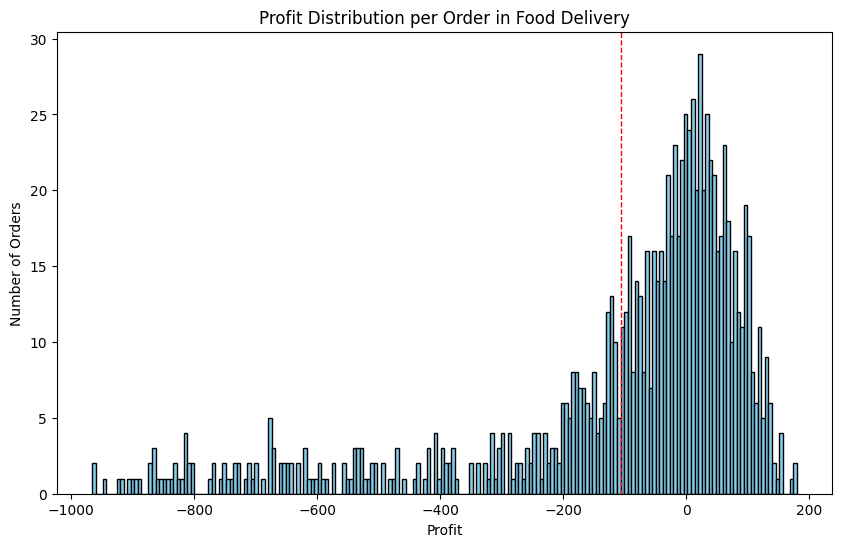

In [61]:
# histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(df['Total Profit'],color='skyblue',bins=200, edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(df['Total Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

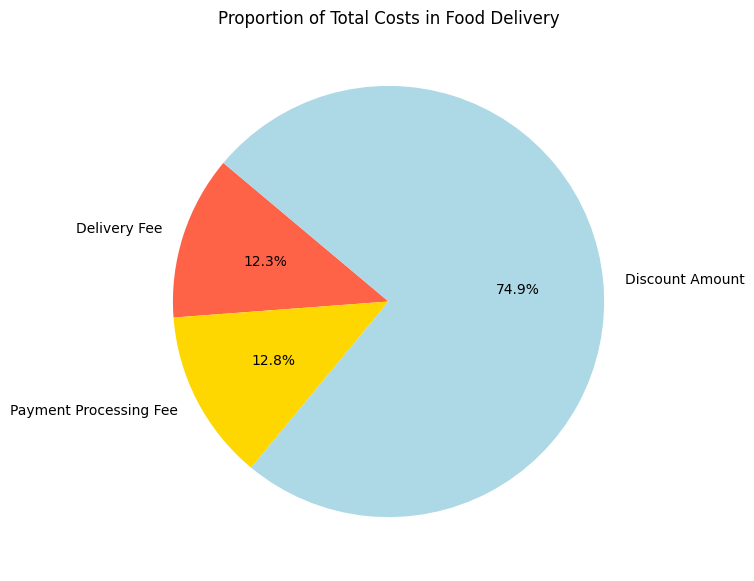

In [62]:
# pie chart for the proportion of total costs
costs_breakdown = df[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

The pie chart illustrates the breakdown of total costs into delivery fees, payment processing fees, and discount amounts. Discounts constitute a significant portion of the costs, suggesting that promotional strategies might be heavily impacting overall profitability.

Now, let’s compare total revenue, total costs, and total profit (net loss in our case):

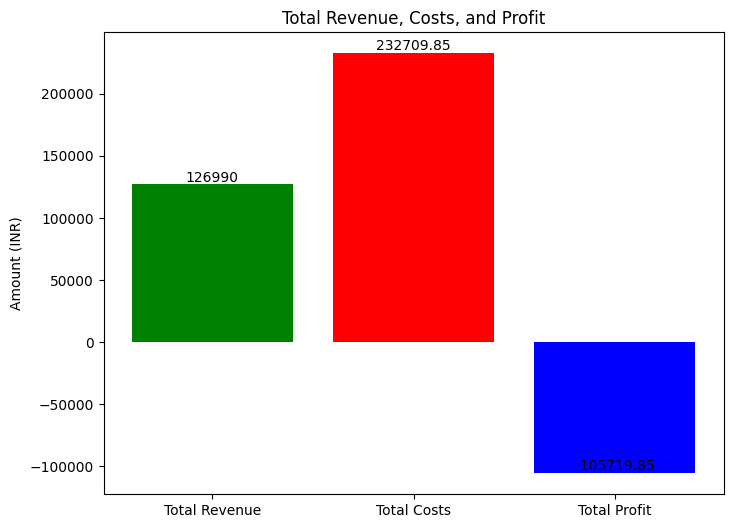

In [66]:
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_Revenue, total_Cost, total_Profit]

plt.figure(figsize=(8, 6))
bars = plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')

# Adding numeric values on top of bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.show()

#A New Strategy for Profits
##From the analysis so far we understood that the discounts on food orders are resulting in huge losses. Now, we need to find a new strategy for profitability. We need to find a sweet spot for offering discounts and charging commissions. To find a sweet spot for commission and discount percentages, we can analyze the characteristics of profitable orders more deeply. Specifically, we need to look for:

##A new average commission percentage based on profitable orders.
##A new average discount percentage for profitable orders, that could serve as a guideline for what level of discount still allows for profitability.
##Given these new averages, we can suggest adjustments that might not only make individual orders profitable but also apply broadly across all orders to improve overall profitability. Let’s calculate:

##The average commission percentage for profitable orders.
##The average discount percentage for profitable orders.

In [67]:
profitable_orders=df[df['Total Profit']>0]

In [68]:
profitable_orders

,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery time,Discount Percentage,Discount Amount,Total Platform Cost,Revenue,Total Profit
Order ID,,,,,,,,,,,,,,,,,
1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,5% on App,150,47,0,0 days 01:28:00,5.0,95.70,142.70,150,7.30
2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0,0 days 00:35:00,10.0,98.60,161.60,198,36.40
4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,None,146,27,0,0 days 00:46:00,0.0,0.00,77.00,146,69.00
6,C7265,R2777,2024-01-25 04:36:00,2024-01-25 05:27:00,439,20,Cash on Delivery,10%,92,27,150,0 days 00:51:00,10.0,43.90,90.90,92,1.10
7,C1466,R2457,2024-12-01 23:55:00,2024-01-13 00:48:00,303,30,Digital Wallet,5% on App,144,12,50,-324 days +00:53:00,5.0,15.15,57.15,144,86.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,C8311,R2380,2024-01-31 06:48:00,2024-01-31 08:43:00,1511,0,Credit Card,5% on App,136,10,0,0 days 01:55:00,5.0,75.55,85.55,136,50.45
990,C8186,R2622,2024-09-01 17:54:00,2024-09-01 18:42:00,1058,50,Credit Card,5% on App,182,45,0,0 days 00:48:00,5.0,52.90,147.90,182,34.10
996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,0 days 00:42:00,5.0,41.25,88.25,165,76.75


In [69]:
# calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

<ipython-input-69-ce7f9396f084>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100


In [70]:
# calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

<ipython-input-70-ad0069941c8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100


In [71]:
# calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(new_avg_commission_percentage, new_avg_discount_percentage)

30.508436145149435 5.867469879518072


Based on the analysis of profitable orders, we find a new set of averages that could represent a “sweet spot” for commission and discount percentages:
New Average Commission Percentage: 30.51%
New Average Discount Percentage: 5.87%


The average commission percentage for profitable orders is significantly higher than the overall average across all orders. It suggests that a higher commission rate on orders might be a key factor in achieving profitability. The average discount percentage for profitable orders is notably lower than the overall average, indicating that lower discounts might contribute to profitability without significantly deterring order volume.

Based on this analysis, a strategy that aims for a commission rate closer to 30% and a discount rate around 6% could potentially improve profitability across the board.

Now, let’s visualize a comparison of profitability using actual versus recommended discounts and commissions across all orders. For this, we need to:

Calculate the profitability per order using the actual discounts and commissions already present in the dataset.
Simulate profitability per order using the recommended discounts (6%) and commissions (30%) to see the potential impact on profitability.
This comparison will help illustrate the potential impact of adopting the recommended discount and commission rates on the overall profitability of orders. Here’s how to visualize this comparison:

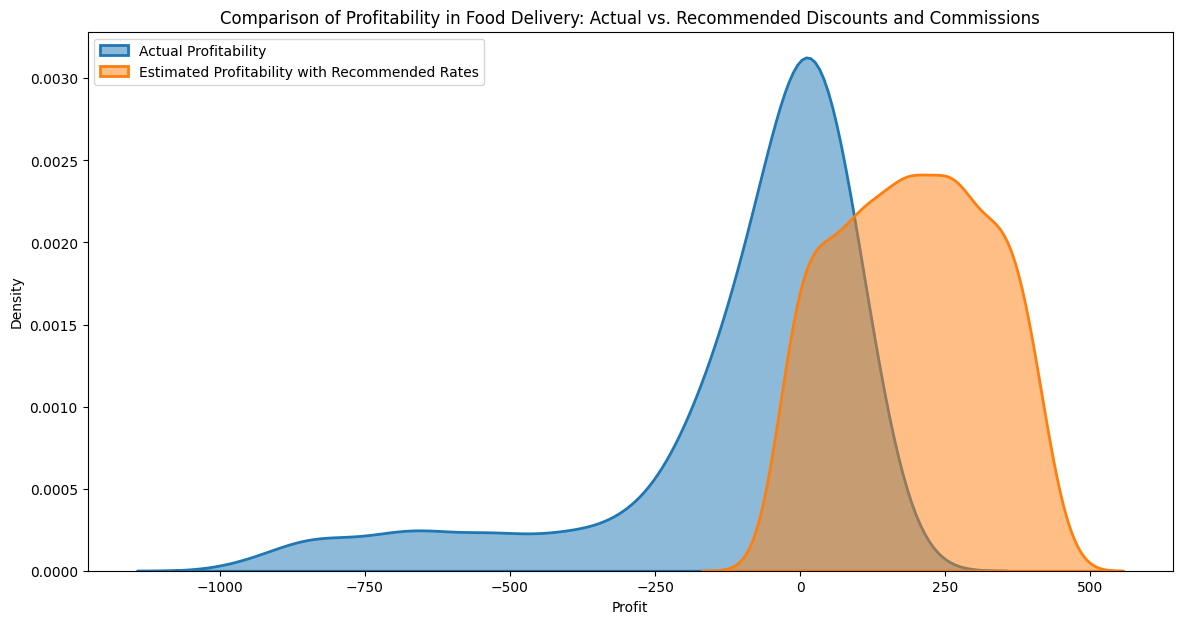

In [73]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 30.0  # 30%
recommended_discount_percentage = 6.0    # 6%

# calculate the simulated commission fee and discount amount using recommended percentages
df['Simulated Commission Fee'] = df['Order Value'] * (recommended_commission_percentage / 100)
df['Simulated Discount Amount'] = df['Order Value'] * (recommended_discount_percentage / 100)

# recalculate total costs and profit with simulated values
df['Simulated Total Costs'] = (df['Delivery Fee'] +
                                        df['Payment Processing Fee'] +
                                        df['Simulated Discount Amount'])

df['Simulated Profit'] = (df['Simulated Commission Fee'] -
                                   df['Simulated Total Costs'])

# visualizing the comparison
import seaborn as sns

plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(df['Total Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(df['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

The visualization compares the distribution of profitability per order using actual discounts and commissions versus the simulated scenario with recommended discounts (6%) and commissions (30%).

The actual profitability distribution shows a mix, with a significant portion of orders resulting in losses (profit < 0) and a broad spread of profit levels for orders. The simulated scenario suggests a shift towards higher profitability per order. The distribution is more skewed towards positive profit, indicating that the recommended adjustments could lead to a higher proportion of profitable orders.

So, this is how you can analyze the cost and profitability of a food delivery company. Food Delivery Cost and Profitability Analysis involves examining all the costs associated with delivering food orders, from direct expenses like delivery fees and packaging to indirect expenses like discounts offered to customers and commission fees paid by restaurants. By juxtaposing these costs against the revenue generated (primarily through order values and commission fees), the analysis aims to provide insights into how profitable the food delivery service is on a per-order basis.